# comparison of overlay with EventWeight to Beam-On data

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/EventWeight/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_07_06'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
281065 pairs from MC-BNB + cosmic DATA overlay
184667 pairs in FV
49272 are 1mu-1p, 26.7%
41135 are other pairs, 22.3%
94260 are cosmic, 51.0%
--------------------------------------------------------------
23788 are CC 1p 0pi, 12.9%


In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']

### re-scaling the cosmic in the overlay

In [6]:
overlay_scalings = dict()
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=None  , OverlaySubsamples=OverlaySamples)
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 0.1317127586412299,
                         'CC 1p 0pi': 0.1317127586412299,
                         'N(Ovelay)/N(On)': 7.592278912963039,
                         'cosmic': 0.1317127586412299,
                         'other pairs': 0.1317127586412299},
    'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.036105020628933594,
                                             'CC 1p 0pi': 0.036105020628933594,
                                             'N(Ovelay)/N(On)': 7.592278912963039,
                                             'cosmic': 0.22341240611075747,
                                             'other pairs': 0.036105020628933594}}


In [8]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

applied cuts to overlay
applied cuts to data


## The selected events

In [9]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
print len(pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])),'events in the overlay'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

350 selected pairs in data
8863 events in the overlay
6890 selected CC 1p 0pi pairs in overlay


In [10]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(overlay_tightFV),'events in the overlay'

print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

5016 events in the overlay
4 selected overlay in tight FV
3845 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


### $Q^2$ distribution in the selected events

In [33]:
var = 'reco_Q2'
x_label = r'reconstructed $Q^2$ (GeV/c)$^2$'
bins = linspace(0,1,8); mid = 0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0.15,0.7)#(np.min(bins),np.max(bins))

comparing in bin: 0.285714285714 h1: 63.0+/-7.9, h2: 42.4+/-1.2
num = 424.3 den = 64.4
chi2 this bin: num/den = 6.6
chi2 : 6.6
comparing in bin: 0.428571428571 h1: 32.0+/-5.7, h2: 16.2+/-0.7
num = 249.5 den = 32.5
chi2 this bin: num/den = 7.7
chi2 : 7.7
comparing in bin: 0.571428571429 h1: 7.0+/-2.6, h2: 5.7+/-0.5
num = 1.7 den = 7.2
chi2 this bin: num/den = 0.2
chi2 : 0.2
chi2,ndf: 14.4925668357 2


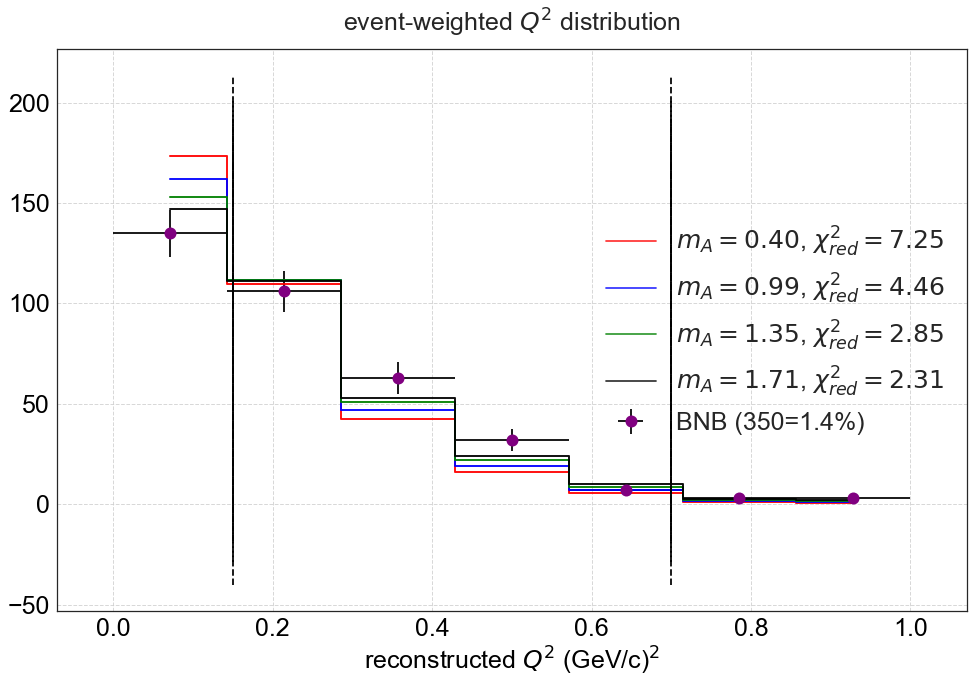

In [34]:
fig,ax=plt.subplots(figsize=(14,9))
h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple'
                                  , OnBeamFV=OnBeamFV, var=var, bins=bins, markersize=12, ax=ax, do_return_h=True)    

for mA,name,color in zip([0.40,0.99,1.35,1.71]              
                         ,['040','099','135','171']
                         ,['red','blue','green','black','orange']):
    h_overlay,h_overlay_err=plot_stacked_MCsamples( OverlaySamples=selected_overlay
                                                   , norm=len(selected_events), ax=ax
                                                   , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                                                   , var=var, weights_var='evwgh_mA'+name+'_Genie', bins=bins
                                                   , do_individual_histograms=False, stackColor=color,stackLabel=None)
    #plt.errorbar(x=mid, y=h_overlay,yerr=h_overlay_err,fmt='.',color=color)
    
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=h_OnBeam , h1err=h_OnBeam_err
                                     , h2=h_overlay ,  h2err=h_overlay_err
                                     , debug=1 if mA==0.4 else 0)
    
#     chi2shape , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
#                                          , h1=h_OnBeam/np.sum(h_OnBeam), h1err=h_OnBeam_err/np.sum(h_OnBeam)
#                                          , h2=h_overlay/np.sum(h_overlay), h2err=h_overlay_err/np.sum(h_overlay))
    
    h_overlay,_=plot_stacked_MCsamples( OverlaySamples=selected_overlay
                                       , norm=len(selected_events)                                  
                                       , ax=ax
                           , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                           , var=var, weights_var='evwgh_mA'+name+'_Genie'
                           , bins=bins
                           , do_individual_histograms=False
                           , stackColor=color
                                       ,stackLabel='$m_A=%.2f$'%mA+', $\chi^2_{red}=%.2f$'%(chi2/ndf))
    plt.plot([chi2_xrange[0],chi2_xrange[0]],ax.get_ylim(),'--'
             ,[chi2_xrange[1],chi2_xrange[1]],ax.get_ylim(),'--'
             ,color='black')
set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1
         ,do_add_legend=True
         ,title='event-weighted $Q^2$ distribution')

# save_figure(figures_path+'Q2_EventWeight.pdf')

In [21]:
var = 'reco_Pp'
x_label = r'reconstructed $p_p$ (GeV/c)'
bins = linspace(0.2,1.3,10); mid = 0.5*(bins[1:]+bins[:-1])

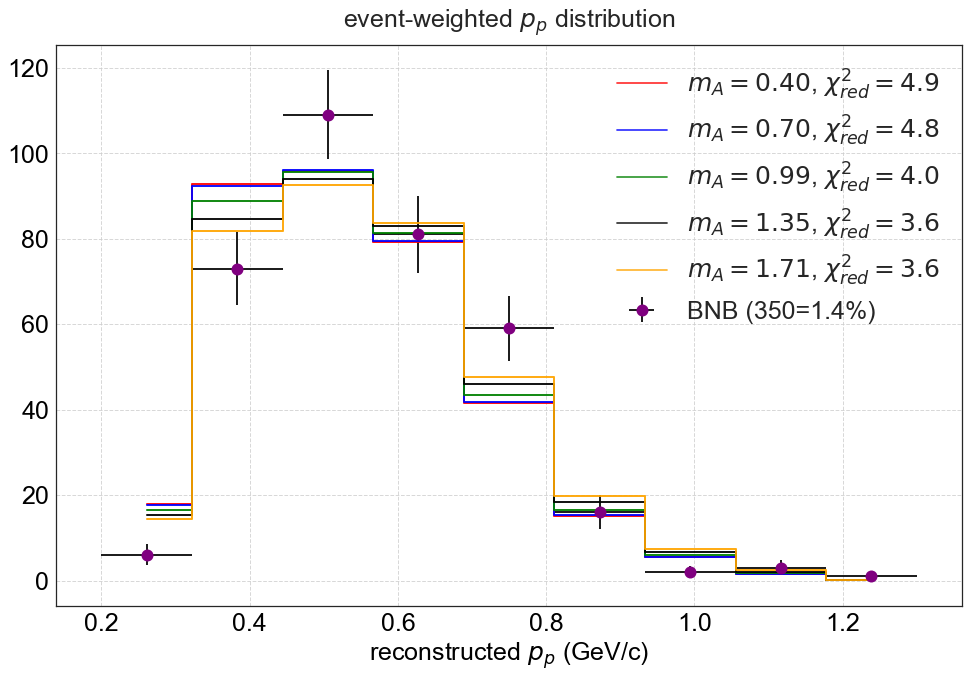

In [22]:
fig,ax=plt.subplots(figsize=(14,9))
h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple'
                                      , OnBeamFV=OnBeamFV
                                      , var=var, bins=bins
                                      , markersize=12
                                      , ax=ax, do_return_h=True)    

for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]              
                         ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    h_overlay,h_overlay_err=plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax
                           , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                           , var=var, weights_var='evwgh_mA'+name+'_Genie'
                           , bins=bins
                           , do_individual_histograms=False
                           , stackColor=color,stackLabel=None)
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                         , h1=h_OnBeam , h1err=h_OnBeam_err
                                         , h2=h_overlay ,  h2err=h_overlay_err )
    h_overlay,_=plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax
                           , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                           , var=var, weights_var='evwgh_mA'+name+'_Genie'
                           , bins=bins
                           , do_individual_histograms=False
                           , stackColor=color
                                       ,stackLabel='$m_A=%.2f$'%mA+', $\chi^2_{red}=%.1f$'%(chi2/ndf))

set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1
         ,do_add_legend=True
         ,title='event-weighted $p_p$ distribution')

# save_figure(figures_path+'Q2_EventWeight.pdf')

# Likelihood-test

## likelihood of a single distribution to itself?

In [114]:
def find_bin(edges, x):
    '''
    find to which bin of 'edges' does x belong
    '''
    for i in range(len(edges)-1):
        if edges[i]<x and x<edges[i+1]:
            return i
    return -1

def LogLikelihood_histograms_data( histo = None, edges=None, epsilon=0.001
                                  , data = None
                                  , debug = 0):
    '''
    input:
    (model) histogram: np.histogram()[0], and its bins np.histogram()[1]
    data: np.array
    epsilon: logarithm cutoff

    return:
    LogLikelihood of the data being sampled from the model distribution    
    '''
    # normalize and add a cut-off for entries ~ 0
    integral = np.sum(histo)
    pdf = np.array([np.max([ epsilon , h/integral ]) for h in histo])
    if debug:
        print 'edges:',edges
        print 'np.sum(pdf):',np.sum(pdf)
    
    LL = 0
    for x in data:
        i = find_bin(edges, x)
        LL += np.log(pdf[i])
        if debug:
            print 'x:',x,',i:',i,',edges[i]:',edges[i],',edges[i+1]:',edges[i+1]
            print 'pdf[i]:',pdf[i],',np.log(pdf[i]):',np.log(pdf[i])
            
    return LL

In [125]:
Nquasidata = 1000
quasidata = selected_CC1p0pi.sample(n=Nquasidata)

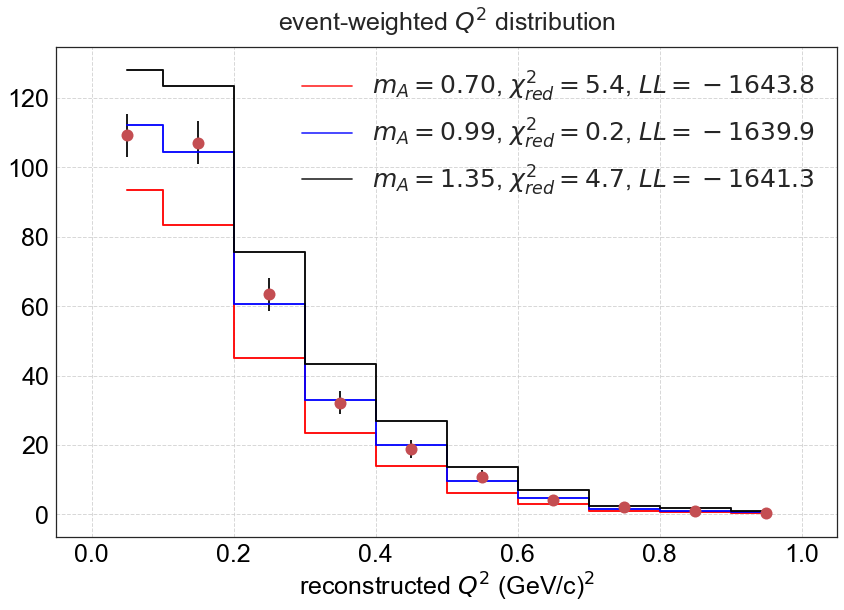

In [126]:
var = 'reco_Q2'
x_label = r'reconstructed $Q^2$ (GeV/c)$^2$'
bins = linspace(0,1,11); mid=0.5*(bins[1:]+bins[:-1])

fig,ax=plt.subplots(figsize=(14,9))
h_quasidata,edges = np.histogram(quasidata[var],bins=bins)
h_quasidata_err = np.sqrt(h_quasidata)*350./Nquasidata
h_quasidata = h_quasidata*350./Nquasidata
plt.errorbar(x=mid,y=h_quasidata,yerr=h_quasidata_err,fmt='ro',markersize=12,color='royalblue',ecolor='black')

for mA,name,color in zip([0.70,0.99,1.35]              
                         ,['070','099','135']
                         ,['red','blue','black']):
    h_overlay,h_overlay_err=plot_stacked_MCsamples( OverlaySamples=selected_overlay
                           , ax=ax
                           , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                           , var=var, weights_var='evwgh_mA'+name+'_Genie'
                           , bins=bins
                           , do_individual_histograms=False
                           , stackColor=color,stackLabel=None)
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                         , h1=h_quasidata , h1err=h_quasidata_err
                                         , h2=h_overlay ,  h2err=h_overlay_err)
    
    
    LogLikelihood = LogLikelihood_histograms_data( histo = h_overlay, edges=edges
                                                  , data = np.array(quasidata[var])
                                                  , epsilon = 0.001 )


    h_overlay,_=plot_stacked_MCsamples( OverlaySamples=selected_overlay
                           , ax=ax
                           , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                           , var=var, weights_var='evwgh_mA'+name+'_Genie'
                           , bins=bins
                           , do_individual_histograms=False
                           , stackColor=color
                                       ,stackLabel=('$m_A=%.2f$'%mA
                                                    +', $\chi^2_{red}=%.1f$'%(chi2/ndf)
                                                    +', $LL=%.1f$'%LogLikelihood))
set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1
         ,do_add_legend=True
         ,title='event-weighted $Q^2$ distribution')